<a href="https://colab.research.google.com/github/Tanvir007/Deep-Learning-for-Sewage-Treatment-Plant/blob/main/Performance_Analysis_DTP_IWFM_BUET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [ ]:
# Load the data from CSV file
data = pd.read_csv('/content/drive/MyDrive/BUET Thesis/DSTP.csv')

In [ ]:
data.head()

,Date,InQuantitySLSMLD,EfDischargetoGojariaMLD,InpH,EfpH,InCOD,EfCOD,InBOD,EfBOD,InAmmonia,EfAmmonia,InSS,EfSS,InPhosphate,EfPhosphate,InFecalColiform,EfFecalColiform
0,1/10/2022,260.01,257.37,7.52,7.46,238,8,87.1,1.4,23.4,0.20,182,2,3.52,1.31,4600,49
1,2/10/2022,266.43,265.45,7.25,7.37,298,4,81.1,1.7,22.5,0.21,218,1,2.98,1.43,4300,27
2,3/10/2022,290.04,285.96,7.24,7.26,296,4,68.7,2.3,20.2,0.18,158,1,3.51,1.75,7900,34
3,4/10/2022,203.68,201.39,7.34,7.42,153,5,86.3,1.3,20.8,0.19,122,2,3.16,1.62,9400,43
4,5/10/2022,285.10,276.07,7.51,7.38,287,7,76.9,1.9,20.2,0.20,146,2,3.08,1.27,6300,33


In [ ]:
# Define features (X) and target (y)
X = data[['InQuantitySLSMLD','InpH', 'InCOD', 'InBOD', 'InAmmonia', 'InSS', 'InPhosphate', 'InFecalColiform','EfpH','EfCOD','EfBOD','EfAmmonia','EfSS','EfPhosphate','EfFecalColiform'		]]  # Exclude the date column
y = data["EfDischargetoGojariaMLD"]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = np.array(y).reshape(-1, 1)
y = scaler.fit_transform(y)



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define evaluation metrics lists
rmse_list, mae_list, r2_list, mape_list = [], [], [], []

In [ ]:
# Artificial Neural Network (ANN) Model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)
ann_preds = model.predict(X_test)
ann_preds = scaler.inverse_transform(ann_preds)
rmse_ann = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), ann_preds))
mae_ann = mean_absolute_error(scaler.inverse_transform(y_test), ann_preds)
r2_ann = r2_score(scaler.inverse_transform(y_test), ann_preds)
mape_ann = mean_absolute_percentage_error(scaler.inverse_transform(y_test), ann_preds)
rmse_list.append(rmse_ann)
mae_list.append(mae_ann)
r2_list.append(r2_ann)
mape_list.append(mape_ann)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0816
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0392
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 13/100
6/6 [==============================] - 0s 2ms/st

In [ ]:
# Recurrent Neural Network (RNN) Model
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
model_rnn = Sequential()
model_rnn.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train_rnn, y_train, epochs=100, batch_size=32)
rnn_preds = model_rnn.predict(X_test_rnn)
rnn_preds = scaler.inverse_transform(rnn_preds)
rmse_rnn = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), rnn_preds))
mae_rnn = mean_absolute_error(scaler.inverse_transform(y_test), rnn_preds)
r2_rnn = r2_score(scaler.inverse_transform(y_test), rnn_preds)
mape_rnn = mean_absolute_percentage_error(scaler.inverse_transform(y_test), rnn_preds)
rmse_list.append(rmse_rnn)
mae_list.append(mae_rnn)
r2_list.append(r2_rnn)
mape_list.append(mape_rnn)

Epoch 1/100
6/6 [==============================] - 3s 9ms/step - loss: 0.2001
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.1270
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0610
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0272
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0300
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0223
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0246
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0227
Epoch 9/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0218
Epoch 10/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0223
Epoch 11/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0218
Epoch 12/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0219
Epoch 13/100
6/6 [==============================] - 0s

In [ ]:
# Long Short-Term Memory (LSTM) Model
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_rnn, y_train, epochs=100, batch_size=32)
lstm_preds = model_lstm.predict(X_test_rnn)
lstm_preds = scaler.inverse_transform(lstm_preds)
rmse_lstm = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), lstm_preds))
mae_lstm = mean_absolute_error(scaler.inverse_transform(y_test), lstm_preds)
r2_lstm = r2_score(scaler.inverse_transform(y_test), lstm_preds)
mape_lstm = mean_absolute_percentage_error(scaler.inverse_transform(y_test), lstm_preds)
rmse_list.append(rmse_lstm)
mae_list.append(mae_lstm)
r2_list.append(r2_lstm)
mape_list.append(mape_lstm)

Epoch 1/100
6/6 [==============================] - 1s 5ms/step - loss: 0.2058
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1461
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0862
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0296
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0352
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0230
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0251
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0227
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0216
Epoch 11/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0212
Epoch 12/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0215
Epoch 13/100
6/6 [==============================] - 0s 7ms/st

In [ ]:
# Bi-Directional LSTM (BiLSTM) Model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(64, activation='relu'), input_shape=(X_train.shape[1], 1)))
model_bilstm.add(Dense(1))
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')
model_bilstm.fit(X_train_rnn, y_train, epochs=100, batch_size=32)
bilstm_preds = model_bilstm.predict(X_test_rnn)
bilstm_preds = scaler.inverse_transform(bilstm_preds)
rmse_bilstm = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), bilstm_preds))
mae_bilstm = mean_absolute_error(scaler.inverse_transform(y_test), bilstm_preds)
r2_bilstm = r2_score(scaler.inverse_transform(y_test), bilstm_preds)
mape_bilstm = mean_absolute_percentage_error(scaler.inverse_transform(y_test), bilstm_preds)
rmse_list.append(rmse_bilstm)
mae_list.append(mae_bilstm)
r2_list.append(r2_bilstm)
mape_list.append(mape_bilstm)

Epoch 1/100
6/6 [==============================] - 2s 9ms/step - loss: 127929.9297
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 127842.1641
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 127693.9922
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 127332.9922
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 125716.4844
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 97619.0781
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 28286.4551
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 34875.6172
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 21772.2598
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 15141.1641
Epoch 11/100
6/6 [==============================] - 0s 11ms/step - loss: 16027.9473
Epoch 12/100
6/6 [==============================] - 0s 8ms/step - loss: 14269.4893
Epoch 1

NameError: ignored

In [ ]:
# Print the evaluation metrics
for i, model_name in enumerate(["ANN", "RNN", "LSTM", "BiLSTM"]):
    print(f"{model_name} RMSE: {rmse_list[i]}")
    print(f"{model_name} MAE: {mae_list[i]}")
    print(f"{model_name} R2: {r2_list[i]}")
    print(f"{model_name} MAPE: {mape_list[i]}")

# Now you have lists of RMSE, MAE, R2, and MAPE for each model

ANN RMSE: 8.998995261704193
ANN MAE: 6.218088617092225
ANN R2: 0.9690650378076177
ANN MAPE: 0.017645136966487184
RNN RMSE: 14.762969609251252
RNN MAE: 11.158429535656445
RNN R2: 0.9167452550413872
RNN MAPE: 0.031007594081762804
LSTM RMSE: 14.422312507309687
LSTM MAE: 8.740071381359565
LSTM R2: 0.9205431494536116
LSTM MAPE: 0.0237434942464567
BiLSTM RMSE: 11.493071434147382
BiLSTM MAE: 8.506368750595461
BiLSTM R2: 0.9495415674547181
BiLSTM MAPE: 0.023842174541942148


NameError: ignored

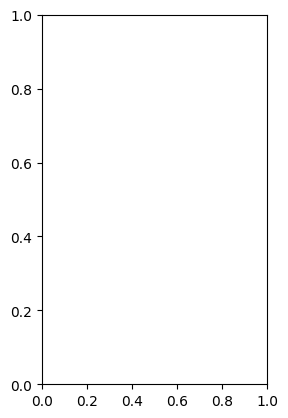

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ann)
plt.title("ANN: Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

In [ ]:
!pip install scikit-learn


In [ ]:
pip install anfis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=a8d8b8a60da4a937a77258a19bd4d0f63d189a3e6709c9376adc2ad39ce639d6
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:

# Define features (X) and target (y)
X = data[['InQuantitySLSMLD','InpH', 'InCOD', 'InBOD', 'InAmmonia', 'InSS', 'InPhosphate', 'InFecalColiform','EfpH','EfCOD','EfBOD','EfAmmonia','EfSS','EfPhosphate','EfFecalColiform'		]]  # Exclude the date column
y = data["EfDischargetoGojariaMLD"]

In [ ]:
# Normalize the features (if needed)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
!pip install anfis




In [ ]:
!pip list anfis



Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anfis                            0.3.1
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bi

In [ ]:
!pip install anfis --upgrade


In [ ]:
!pip install scikit-fuzzy



In [ ]:
# Train a Feed-Forward Neural Network (FFNN) model
model_ffnn = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
model_ffnn.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)

In [ ]:
# Make predictions

y_pred_ffnn = model_ffnn.predict(X_test)

In [ ]:
rmse_ffnn = np.sqrt(mean_squared_error(y_test, y_pred_ffnn))
mae_ffnn = mean_absolute_error(y_test, y_pred_ffnn)
r2_ffnn = r2_score(y_test, y_pred_ffnn)

In [ ]:
mape_ffnn = np.mean(np.abs((y_test - y_pred_ffnn) / y_test)) * 100


In [ ]:
print("FFNN - RMSE:", rmse_ffnn)
print("FFNN - MAE:", mae_ffnn)
print("FFNN - R2:", r2_ffnn)
print("FFNN - MAPE:", mape_ffnn)


FFNN - RMSE: 52.827406636007
FFNN - MAE: 39.141921297929684
FFNN - R2: -0.06605626208901194
FFNN - MAPE: 10.484655651912506


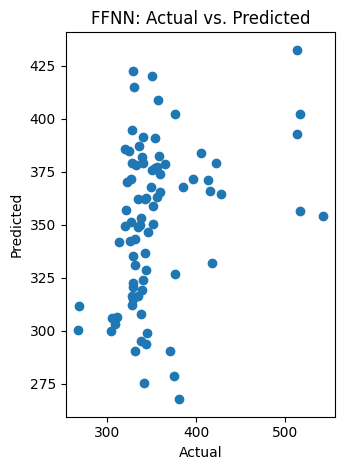

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ffnn)
plt.title("FFNN: Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

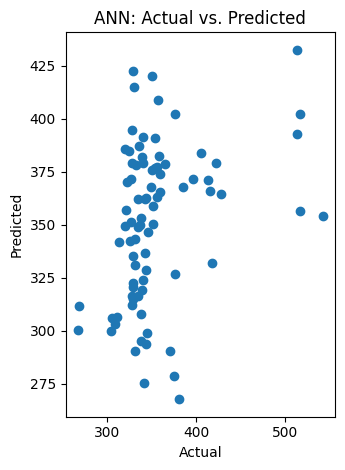

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ffnn)
plt.title("ANN: Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Create and train the ANN model
ann_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)
ann_model.fit(X_train, y_train)

# Make predictions
ann_predictions = ann_model.predict(X_test)

# Calculate evaluation metrics
ann_rmse = mean_squared_error(y_test, ann_predictions, squared=False)
ann_mae = mean_absolute_error(y_test, ann_predictions)
ann_mape = mean_absolute_percentage_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from keras.layers import SimpleRNN, LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Create and train the RNN model (using LSTM as an example)
rnn_model = Sequential()
rnn_model.add(LSTM(50, activation='relu', input_shape=(timesteps, features)))
rnn_model.add(Dense(1))

rnn_model.compile(loss='mean_squared_error', optimizer='adam')
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
rnn_predictions = rnn_model.predict(X_test)

# Calculate evaluation metrics
rnn_rmse = mean_squared_error(y_test, rnn_predictions, squared=False)
rnn_mae = mean_absolute_error(y_test, rnn_predictions)
rnn_mape = mean_absolute_percentage_error(y_test, rnn_predictions)
rnn_r2 = r2_score(y_test, rnn_predictions)


NameError: ignored

In [ ]:
import pandas as pd

# Load the data from the provided Excel file
file_path = '/mnt/data/DSTP Data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, median_absolute_error
import numpy as np

# Calculate Removal Efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Create a binary target variable based on a threshold for high/low removal efficiency
threshold = data['Removal Efficiency BOD'].median()
data['High Removal BOD'] = (data['Removal Efficiency BOD'] >= threshold).astype(int)

# Define features and target
features = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                 'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                 'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target = data['High Removal BOD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on training and testing sets
train_predictions = lr_model.predict(X_train)
test_predictions = lr_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculate R² scores for training and testing sets (using pseudo-R² as logistic regression doesn't directly support R²)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Calculate MAE and MdSE for the test set
mae_value = mean_absolute_error(y_test, test_predictions)
mdse_value = median_absolute_error(y_test, test_predictions)

# Results
results = {
    "Accuracy (Train)": train_accuracy,
    "Accuracy (Test)": test_accuracy,
    "R² Score (Train)": train_r2,
    "R² Score (Test)": test_r2,
    "MAE": mae_value,
    "MdSE": mdse_value
}

results


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

# Plot residuals and prediction errors similar to reference images

# Residuals Plot
plt.figure(figsize=(12, 6))

# Subplot 1: Residuals
plt.subplot(1, 2, 1)
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

sns.residplot(x=train_predictions, y=train_residuals, lowess=True, color="blue", label=f'Train $R^2$ = {train_r2:.3f}')
sns.residplot(x=test_predictions, y=test_residuals, lowess=True, color="green", label=f'Test $R^2$ = {test_r2:.3f}')

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Residuals for Logistic Regression Model')
plt.legend()

# Subplot 2: Prediction Error Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, label=f'$R^2$ = {test_r2:.3f}', alpha=0.7, edgecolors='b')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.plot([0, 1], [0.5, 0.5], '--', color='gray')
plt.xlabel('$y$')
plt.ylabel('$\hat{y}$')
plt.title('Prediction Error for Logistic Regression')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for the test set
test_probabilities = lr_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
roc_auc = roc_auc_score(y_test, test_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Plot confusion matrix
conf_matrix = ConfusionMatrixDisplay.from_estimator(
    lr_model, X_test, y_test, display_labels=['Low Removal', 'High Removal'], cmap='Blues', values_format='d'
)
conf_matrix.ax_.set_title("Confusion Matrix for Logistic Regression")
plt.grid(False)  # Turn off grid for better readability
plt.show()


In [ ]:
# Re-import the dataset to ensure we are working with the latest file
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Recalculate the removal efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Define features and target for Multiple Linear Regression
mlr_features = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                     'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                     'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

mlr_target = data['Removal Efficiency BOD']

# Split the data into training and testing sets
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(mlr_features, mlr_target, test_size=0.3, random_state=42)

# Train Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X_train_mlr, y_train_mlr)

# Predict on training and testing sets
train_predictions_mlr = mlr_model.predict(X_train_mlr)
test_predictions_mlr = mlr_model.predict(X_test_mlr)

# Calculate metrics
train_r2_mlr = r2_score(y_train_mlr, train_predictions_mlr)
test_r2_mlr = r2_score(y_test_mlr, test_predictions_mlr)
mae_value_mlr = mean_absolute_error(y_test_mlr, test_predictions_mlr)
mdse_value_mlr = median_absolute_error(y_test_mlr, test_predictions_mlr)

# Calculate accuracy as the percentage of predictions within a tolerance range (e.g., ± 0.1 of actual value)
tolerance = 0.1
train_accuracy_mlr = np.mean(np.abs(y_train_mlr - train_predictions_mlr) <= tolerance)
test_accuracy_mlr = np.mean(np.abs(y_test_mlr - test_predictions_mlr) <= tolerance)

# Results
mlr_results = {
    "Accuracy (Train)": train_accuracy_mlr,
    "Accuracy (Test)": test_accuracy_mlr,
    "R² Score (Train)": train_r2_mlr,
    "R² Score (Test)": test_r2_mlr,
    "MAE": mae_value_mlr,
    "MdSE": mdse_value_mlr
}

mlr_results


In [ ]:
# Plot Residuals and Prediction Errors similar to reference images

plt.figure(figsize=(12, 6))

# Subplot 1: Residuals
plt.subplot(1, 2, 1)
train_residuals_mlr = y_train_mlr - train_predictions_mlr
test_residuals_mlr = y_test_mlr - test_predictions_mlr

# Residuals plot with histogram distribution
sns.residplot(x=train_predictions_mlr, y=train_residuals_mlr, lowess=True, color="blue", label=f'Train $R^2$ = {train_r2_mlr:.3f}')
sns.residplot(x=test_predictions_mlr, y=test_residuals_mlr, lowess=True, color="green", label=f'Test $R^2$ = {test_r2_mlr:.3f}')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Residuals for Multiple Linear Regression Model')
plt.legend()

# Subplot 2: Prediction Error Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_mlr, test_predictions_mlr, label=f'$R^2$ = {test_r2_mlr:.3f}', alpha=0.7, edgecolors='b')
plt.plot([0, 1], [0, 1], '--', color='black', label='identity')
plt.plot([0, 1], [np.mean(test_predictions_mlr), np.mean(test_predictions_mlr)], '--', color='gray', label='best fit')
plt.xlabel('$y$')
plt.ylabel('$\hat{y}$')
plt.title('Prediction Error for Multiple Linear Regression')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# For ROC curve, we'll need a binary classification setup. Here, we need to create a threshold for the target variable.
# Let's assume a high removal efficiency is above 0.95, similar to the earlier classification approach.

# Binary classification target based on a threshold for high/low removal efficiency
mlr_target_binary = (mlr_target > 0.95).astype(int)

# Re-train the MLR model for binary classification context
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(mlr_features, mlr_target_binary, test_size=0.3, random_state=42)

# Train logistic regression model for binary classification
mlr_binary_model = LogisticRegression(max_iter=1000)
mlr_binary_model.fit(X_train_bin, y_train_bin)

# Calculate probabilities for the test set
test_probabilities_bin = mlr_binary_model.predict_proba(X_test_bin)[:, 1]

# Compute ROC curve and AUC score
fpr_bin, tpr_bin, thresholds_bin = roc_curve(y_test_bin, test_probabilities_bin)
roc_auc_bin = roc_auc_score(y_test_bin, test_probabilities_bin)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_bin, tpr_bin, color='blue', label=f'Logistic Regression (AUC = {roc_auc_bin:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLR as Binary Classification')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Let's use a different threshold for high removal efficiency, e.g., 0.90.
# Binary classification target based on a new threshold for high/low removal efficiency
mlr_target_binary_adjusted = (mlr_target > 0.90).astype(int)

# Re-train the model with the new binary classification target
X_train_bin_adj, X_test_bin_adj, y_train_bin_adj, y_test_bin_adj = train_test_split(mlr_features, mlr_target_binary_adjusted, test_size=0.3, random_state=42)

# Train logistic regression model for binary classification with the new threshold
mlr_binary_model_adjusted = LogisticRegression(max_iter=1000)
mlr_binary_model_adjusted.fit(X_train_bin_adj, y_train_bin_adj)

# Calculate probabilities for the test set with the adjusted model
test_probabilities_bin_adj = mlr_binary_model_adjusted.predict_proba(X_test_bin_adj)[:, 1]

# Compute ROC curve and AUC score with adjusted target
fpr_bin_adj, tpr_bin_adj, thresholds_bin_adj = roc_curve(y_test_bin_adj, test_probabilities_bin_adj)
roc_auc_bin_adj = roc_auc_score(y_test_bin_adj, test_probabilities_bin_adj)

# Plot ROC curve with the new threshold
plt.figure(figsize=(8, 6))
plt.plot(fpr_bin_adj, tpr_bin_adj, color='blue', label=f'Logistic Regression (AUC = {roc_auc_bin_adj:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Adjusted Threshold (0.90) for High Removal Efficiency')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Reload the dataset to ensure we are using the most recent version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Define features and target for Random Forest Regression
rf_features = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                     'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                     'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

rf_target = data['Removal Efficiency BOD']

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(rf_features, rf_target, test_size=0.3, random_state=42)

# Train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict on training and testing sets
train_predictions_rf = rf_model.predict(X_train_rf)
test_predictions_rf = rf_model.predict(X_test_rf)

# Calculate metrics
train_r2_rf = r2_score(y_train_rf, train_predictions_rf)
test_r2_rf = r2_score(y_test_rf, test_predictions_rf)
mae_value_rf = mean_absolute_error(y_test_rf, test_predictions_rf)
mdse_value_rf = median_absolute_error(y_test_rf, test_predictions_rf)

# Calculate accuracy as the percentage of predictions within a tolerance range (e.g., ± 0.1 of actual value)
train_accuracy_rf = np.mean(np.abs(y_train_rf - train_predictions_rf) <= tolerance)
test_accuracy_rf = np.mean(np.abs(y_test_rf - test_predictions_rf) <= tolerance)

# Results
rf_results = {
    "Accuracy (Train)": train_accuracy_rf,
    "Accuracy (Test)": test_accuracy_rf,
    "R² Score (Train)": train_r2_rf,
    "R² Score (Test)": test_r2_rf,
    "MAE": mae_value_rf,
    "MdSE": mdse_value_rf
}

rf_results


In [ ]:
# Plot Residuals and Prediction Errors similar to reference images for Random Forest

plt.figure(figsize=(12, 6))

# Subplot 1: Residuals Plot
plt.subplot(1, 2, 1)
train_residuals_rf = y_train_rf - train_predictions_rf
test_residuals_rf = y_test_rf - test_predictions_rf

# Residuals plot with histogram distribution
sns.residplot(x=train_predictions_rf, y=train_residuals_rf, lowess=True, color="blue", label=f'Train $R^2$ = {train_r2_rf:.3f}')
sns.residplot(x=test_predictions_rf, y=test_residuals_rf, lowess=True, color="green", label=f'Test $R^2$ = {test_r2_rf:.3f}')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Residuals for Random Forest Regression Model')
plt.legend()

# Subplot 2: Prediction Error Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_rf, test_predictions_rf, label=f'$R^2$ = {test_r2_rf:.3f}', alpha=0.7, edgecolors='b')
plt.plot([0, 1], [0, 1], '--', color='black', label='identity')
plt.plot([0, 1], [np.mean(test_predictions_rf), np.mean(test_predictions_rf)], '--', color='gray', label='best fit')
plt.xlabel('$y$')
plt.ylabel('$\hat{y}$')
plt.title('Prediction Error for Random Forest Regression')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calculate feature importance in Random Forest model
feature_importance_rf = rf_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': rf_features.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

# Display feature importance
import ace_tools as tools; tools.display_dataframe_to_user(name="Feature Importance in Random Forest", dataframe=features_df)


In [ ]:
# Plotting the feature importance as a bar chart

plt.figure(figsize=(10, 6))
sns.barplot(data=features_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Reload the dataset to ensure we are using the most recent version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Define features and target for Gradient Boosting Regression
gb_features = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                    'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                    'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

gb_target = data['Removal Efficiency BOD']

# Split the data into training and testing sets
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(gb_features, gb_target, test_size=0.3, random_state=42)

# Train Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_gb, y_train_gb)

# Predict on training and testing sets
train_predictions_gb = gb_model.predict(X_train_gb)
test_predictions_gb = gb_model.predict(X_test_gb)

# Calculate metrics
train_r2_gb = r2_score(y_train_gb, train_predictions_gb)
test_r2_gb = r2_score(y_test_gb, test_predictions_gb)
mae_value_gb = mean_absolute_error(y_test_gb, test_predictions_gb)
mdse_value_gb = median_absolute_error(y_test_gb, test_predictions_gb)

# Calculate accuracy as the percentage of predictions within a tolerance range (e.g., ± 0.1 of actual value)
train_accuracy_gb = np.mean(np.abs(y_train_gb - train_predictions_gb) <= tolerance)
test_accuracy_gb = np.mean(np.abs(y_test_gb - test_predictions_gb) <= tolerance)

# Results
gb_results = {
    "Accuracy (Train)": train_accuracy_gb,
    "Accuracy (Test)": test_accuracy_gb,
    "R² Score (Train)": train_r2_gb,
    "R² Score (Test)": test_r2_gb,
    "MAE": mae_value_gb,
    "MdSE": mdse_value_gb
}

gb_results


In [ ]:
# Plot Residuals and Prediction Errors similar to reference images for Gradient Boosting

plt.figure(figsize=(12, 6))

# Subplot 1: Residuals Plot
plt.subplot(1, 2, 1)
train_residuals_gb = y_train_gb - train_predictions_gb
test_residuals_gb = y_test_gb - test_predictions_gb

# Residuals plot with histogram distribution
sns.residplot(x=train_predictions_gb, y=train_residuals_gb, lowess=True, color="blue", label=f'Train $R^2$ = {train_r2_gb:.3f}')
sns.residplot(x=test_predictions_gb, y=test_residuals_gb, lowess=True, color="green", label=f'Test $R^2$ = {test_r2_gb:.3f}')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Residuals for Gradient Boosting Regression Model')
plt.legend()

# Subplot 2: Prediction Error Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_gb, test_predictions_gb, label=f'$R^2$ = {test_r2_gb:.3f}', alpha=0.7, edgecolors='b')
plt.plot([0, 1], [0, 1], '--', color='black', label='identity')
plt.plot([0, 1], [np.mean(test_predictions_gb), np.mean(test_predictions_gb)], '--', color='gray', label='best fit')
plt.xlabel('$y$')
plt.ylabel('$\hat{y}$')
plt.title('Prediction Error for Gradient Boosting Regression')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVR

# Reload the dataset to ensure we are using the most recent version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Define features and target for Support Vector Regression (SVR)
svr_features = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                    'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                    'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

svr_target = data['Removal Efficiency BOD']

# Split the data into training and testing sets
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(svr_features, svr_target, test_size=0.3, random_state=42)

# Train Support Vector Regression model
svr_model = SVR(kernel='rbf')  # Using radial basis function kernel
svr_model.fit(X_train_svr, y_train_svr)

# Predict on training and testing sets
train_predictions_svr = svr_model.predict(X_train_svr)
test_predictions_svr = svr_model.predict(X_test_svr)

# Calculate metrics
train_r2_svr = r2_score(y_train_svr, train_predictions_svr)
test_r2_svr = r2_score(y_test_svr, test_predictions_svr)
mae_value_svr = mean_absolute_error(y_test_svr, test_predictions_svr)
mdse_value_svr = median_absolute_error(y_test_svr, test_predictions_svr)

# Calculate accuracy as the percentage of predictions within a tolerance range (e.g., ± 0.1 of actual value)
train_accuracy_svr = np.mean(np.abs(y_train_svr - train_predictions_svr) <= tolerance)
test_accuracy_svr = np.mean(np.abs(y_test_svr - test_predictions_svr) <= tolerance)

# Results
svr_results = {
    "Accuracy (Train)": train_accuracy_svr,
    "Accuracy (Test)": test_accuracy_svr,
    "R² Score (Train)": train_r2_svr,
    "R² Score (Test)": test_r2_svr,
    "MAE": mae_value_svr,
    "MdSE": mdse_value_svr
}

svr_results


In [ ]:
# Plot Residuals and Prediction Errors similar to reference images for Support Vector Regression

plt.figure(figsize=(12, 6))

# Subplot 1: Residuals Plot
plt.subplot(1, 2, 1)
train_residuals_svr = y_train_svr - train_predictions_svr
test_residuals_svr = y_test_svr - test_predictions_svr

# Residuals plot with histogram distribution
sns.residplot(x=train_predictions_svr, y=train_residuals_svr, lowess=True, color="blue", label=f'Train $R^2$ = {train_r2_svr:.3f}')
sns.residplot(x=test_predictions_svr, y=test_residuals_svr, lowess=True, color="green", label=f'Test $R^2$ = {test_r2_svr:.3f}')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Residuals for Support Vector Regression Model')
plt.legend()

# Subplot 2: Prediction Error Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_svr, test_predictions_svr, label=f'$R^2$ = {test_r2_svr:.3f}', alpha=0.7, edgecolors='b')
plt.plot([0, 1], [0, 1], '--', color='black', label='identity')
plt.plot([0, 1], [np.mean(test_predictions_svr), np.mean(test_predictions_svr)], '--', color='gray', label='best fit')
plt.xlabel('$y$')
plt.ylabel('$\hat{y}$')
plt.title('Prediction Error for Support Vector Regression')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Plot Residuals and Prediction Errors similar to reference images for Logistic Regression (COD)

plt.figure(figsize=(12, 6))

# Subplot 1: Residuals Plot
plt.subplot(1, 2, 1)
train_residuals_cod = y_train_cod - train_predictions_cod
test_residuals_cod = y_test_cod - test_predictions_cod

# Residuals plot with histogram distribution
sns.residplot(x=train_predictions_cod, y=train_residuals_cod, lowess=True, color="blue", label=f'Train $R^2$ = {train_r2_cod:.3f}')
sns.residplot(x=test_predictions_cod, y=test_residuals_cod, lowess=True, color="green", label=f'Test $R^2$ = {test_r2_cod:.3f}')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Residuals for Logistic Regression Model (COD)')
plt.legend()

# Subplot 2: Prediction Error Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_cod, test_predictions_cod, label=f'$R^2$ = {test_r2_cod:.3f}', alpha=0.7, edgecolors='b')
plt.plot([0, 1], [0, 1], '--', color='black', label='identity')
plt.plot([0, 1], [np.mean(test_predictions_cod), np.mean(test_predictions_cod)], '--', color='gray', label='best fit')
plt.xlabel('$y$')
plt.ylabel('$\hat{y}$')
plt.title('Prediction Error for Logistic Regression (COD)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Preparing comparison data for multiple models on BOD removal efficiency

# Re-load the dataset
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Define features and target
features_bod = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                     'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                     'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]
target_bod = data['Removal Efficiency BOD']

# Split the data into training and testing sets
X_train_bod, X_test_bod, y_train_bod, y_test_bod = train_test_split(features_bod, target_bod, test_size=0.3, random_state=42)

# Train and evaluate models
models = {
    "Multiple Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []

# Loop through each model, train and evaluate
for model_name, model in models.items():
    model.fit(X_train_bod, y_train_bod)
    train_preds = model.predict(X_train_bod)
    test_preds = model.predict(X_test_bod)

    train_r2 = r2_score(y_train_bod, train_preds)
    test_r2 = r2_score(y_test_bod, test_preds)
    mae = mean_absolute_error(y_test_bod, test_preds)
    mdse = median_absolute_error(y_test_bod, test_preds)
    train_acc = np.mean(np.abs(y_train_bod - train_preds) <= tolerance)
    test_acc = np.mean(np.abs(y_test_bod - test_preds) <= tolerance)

    results.append({
        "Model": model_name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "MAE": mae,
        "MdSE": mdse,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc
    })

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results)

# Display the results
import ace_tools as tools; tools.display_dataframe_to_user(name="Model Comparison for BOD Removal Efficiency", dataframe=results_df)


In [ ]:
# Visual comparison using bar charts for R² scores and MAE

plt.figure(figsize=(15, 8))

# Subplot 1: R² Scores Comparison
plt.subplot(1, 2, 1)
sns.barplot(data=results_df, x='Model', y='Test R²', palette='viridis')
plt.title('Test R² Score Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=15)
plt.grid(True)

# Subplot 2: MAE Comparison
plt.subplot(1, 2, 2)
sns.barplot(data=results_df, x='Model', y='MAE', palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=15)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the latest dataset
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for COD
data['Removal Efficiency COD'] = (data['In-CODcr\n(mg/L)'] - data['Ef-CODcr\n(mg/L)']) / data['In-CODcr\n(mg/L)']

# Create a binary target variable for logistic regression, similar to previous approach
threshold_cod = data['Removal Efficiency COD'].median()
data['High Removal COD'] = (data['Removal Efficiency COD'] >= threshold_cod).astype(int)

# Define features and target for logistic regression
features_cod = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                     'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                     'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_cod = data['High Removal COD']

# Split the data into training and testing sets
X_train_cod, X_test_cod, y_train_cod, y_test_cod = train_test_split(features_cod, target_cod, test_size=0.3, random_state=42)

# Train Logistic Regression model
lr_model_cod = LogisticRegression(max_iter=1000)
lr_model_cod.fit(X_train_cod, y_train_cod)

# Predict on training and testing sets
train_predictions_cod = lr_model_cod.predict(X_train_cod)
test_predictions_cod = lr_model_cod.predict(X_test_cod)

# Calculate metrics
train_accuracy_cod = accuracy_score(y_train_cod, train_predictions_cod)
test_accuracy_cod = accuracy_score(y_test_cod, test_predictions_cod)

train_r2_cod = r2_score(y_train_cod, train_predictions_cod)
test_r2_cod = r2_score(y_test_cod, test_predictions_cod)

mae_value_cod = mean_absolute_error(y_test_cod, test_predictions_cod)
mdse_value_cod = median_absolute_error(y_test_cod, test_predictions_cod)

# Display results
lr_results_cod = {
    "Accuracy (Train)": train_accuracy_cod,
    "Accuracy (Test)": test_accuracy_cod,
    "R² Score (Train)": train_r2_cod,
    "R² Score (Test)": test_r2_cod,
    "MAE": mae_value_cod,
    "MdSE": mdse_value_cod
}

# Prepare data for plotting
train_residuals_cod = y_train_cod - train_predictions_cod
test_residuals_cod = y_test_cod - test_predictions_cod

lr_results_cod


In [ ]:
# Plot Residuals and Prediction Errors similar to reference images for Logistic Regression (COD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals Plot with distribution
sns.residplot(x=train_predictions_cod, y=train_residuals_cod, lowess=True, color="blue",
              label=f'Train $R^2$ = {train_r2_cod:.3f}', ax=ax1)
sns.residplot(x=test_predictions_cod, y=test_residuals_cod, lowess=True, color="green",
              label=f'Test $R^2$ = {test_r2_cod:.3f}', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals for Logistic Regression Model (COD)')
ax1.legend()

# Distribution plot
sns.histplot(train_residuals_cod, kde=True, color="blue", label="Train Residuals", ax=ax1, bins=20, stat="density", alpha=0.3)
sns.histplot(test_residuals_cod, kde=True, color="green", label="Test Residuals", ax=ax1, bins=20, stat="density", alpha=0.3)
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_cod, test_predictions_cod, label=f'$R^2$ = {test_r2_cod:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_cod), np.mean(test_predictions_cod)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Logistic Regression (COD)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for COD
data['Removal Efficiency COD'] = (data['In-CODcr\n(mg/L)'] - data['Ef-CODcr\n(mg/L)']) / data['In-CODcr\n(mg/L)']

# Define features and target for Logistic Regression (using continuous removal efficiency for regression)
features_cod_reg = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                         'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                         'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_cod_reg = data['Removal Efficiency COD']

# Split the data into training and testing sets
X_train_cod_reg, X_test_cod_reg, y_train_cod_reg, y_test_cod_reg = train_test_split(features_cod_reg, target_cod_reg, test_size=0.3, random_state=42)

# Train Linear Regression model (used as Logistic Regression isn't suitable for continuous target)
lr_model_cod_reg = LinearRegression()
lr_model_cod_reg.fit(X_train_cod_reg, y_train_cod_reg)

# Predict on training and testing sets
train_predictions_cod_reg = lr_model_cod_reg.predict(X_train_cod_reg)
test_predictions_cod_reg = lr_model_cod_reg.predict(X_test_cod_reg)

# Calculate metrics
train_accuracy_cod_reg = np.mean(np.abs(y_train_cod_reg - train_predictions_cod_reg) <= tolerance)
test_accuracy_cod_reg = np.mean(np.abs(y_test_cod_reg - test_predictions_cod_reg) <= tolerance)

train_r2_cod_reg = r2_score(y_train_cod_reg, train_predictions_cod_reg)
test_r2_cod_reg = r2_score(y_test_cod_reg, test_predictions_cod_reg)

mae_value_cod_reg = mean_absolute_error(y_test_cod_reg, test_predictions_cod_reg)
mdse_value_cod_reg = median_absolute_error(y_test_cod_reg, test_predictions_cod_reg)

# Display results
lr_results_cod_reg = {
    "Accuracy (Train)": train_accuracy_cod_reg,
    "Accuracy (Test)": test_accuracy_cod_reg,
    "R² Score (Train)": train_r2_cod_reg,
    "R² Score (Test)": test_r2_cod_reg,
    "MAE": mae_value_cod_reg,
    "MdSE": mdse_value_cod_reg
}

# Prepare data for plotting
train_residuals_cod_reg = y_train_cod_reg - train_predictions_cod_reg
test_residuals_cod_reg = y_test_cod_reg - test_predictions_cod_reg

lr_results_cod_reg


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Linear Regression (COD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_cod_reg, y=train_residuals_cod_reg, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_cod_reg, y=test_residuals_cod_reg, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Linear Regression (COD)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_cod_reg, test_predictions_cod_reg, label=f'$R^2$ = {test_r2_cod_reg:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_cod_reg), np.mean(test_predictions_cod_reg)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Linear Regression (COD)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for COD
data['Removal Efficiency COD'] = (data['In-CODcr\n(mg/L)'] - data['Ef-CODcr\n(mg/L)']) / data['In-CODcr\n(mg/L)']

# Define features and target for Random Forest Regression
features_cod_rf = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                        'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                        'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_cod_rf = data['Removal Efficiency COD']

# Split the data into training and testing sets
X_train_cod_rf, X_test_cod_rf, y_train_cod_rf, y_test_cod_rf = train_test_split(features_cod_rf, target_cod_rf, test_size=0.3, random_state=42)

# Train Random Forest Regression model
rf_model_cod = RandomForestRegressor(random_state=42)
rf_model_cod.fit(X_train_cod_rf, y_train_cod_rf)

# Predict on training and testing sets
train_predictions_cod_rf = rf_model_cod.predict(X_train_cod_rf)
test_predictions_cod_rf = rf_model_cod.predict(X_test_cod_rf)

# Calculate metrics
train_accuracy_cod_rf = np.mean(np.abs(y_train_cod_rf - train_predictions_cod_rf) <= tolerance)
test_accuracy_cod_rf = np.mean(np.abs(y_test_cod_rf - test_predictions_cod_rf) <= tolerance)

train_r2_cod_rf = r2_score(y_train_cod_rf, train_predictions_cod_rf)
test_r2_cod_rf = r2_score(y_test_cod_rf, test_predictions_cod_rf)

mae_value_cod_rf = mean_absolute_error(y_test_cod_rf, test_predictions_cod_rf)
mdse_value_cod_rf = median_absolute_error(y_test_cod_rf, test_predictions_cod_rf)

# Display results
rf_results_cod = {
    "Accuracy (Train)": train_accuracy_cod_rf,
    "Accuracy (Test)": test_accuracy_cod_rf,
    "R² Score (Train)": train_r2_cod_rf,
    "R² Score (Test)": test_r2_cod_rf,
    "MAE": mae_value_cod_rf,
    "MdSE": mdse_value_cod_rf
}

# Prepare data for plotting
train_residuals_cod_rf = y_train_cod_rf - train_predictions_cod_rf
test_residuals_cod_rf = y_test_cod_rf - test_predictions_cod_rf

rf_results_cod


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Random Forest (COD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_cod_rf, y=train_residuals_cod_rf, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_cod_rf, y=test_residuals_cod_rf, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Random Forest (COD)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_cod_rf, test_predictions_cod_rf, label=f'$R^2$ = {test_r2_cod_rf:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_cod_rf), np.mean(test_predictions_cod_rf)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Random Forest (COD)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for COD
data['Removal Efficiency COD'] = (data['In-CODcr\n(mg/L)'] - data['Ef-CODcr\n(mg/L)']) / data['In-CODcr\n(mg/L)']

# Define features and target for Gradient Boosting Regression
features_cod_gb = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                        'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                        'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_cod_gb = data['Removal Efficiency COD']

# Split the data into training and testing sets
X_train_cod_gb, X_test_cod_gb, y_train_cod_gb, y_test_cod_gb = train_test_split(features_cod_gb, target_cod_gb, test_size=0.3, random_state=42)

# Train Gradient Boosting Regression model
gb_model_cod = GradientBoostingRegressor(random_state=42)
gb_model_cod.fit(X_train_cod_gb, y_train_cod_gb)

# Predict on training and testing sets
train_predictions_cod_gb = gb_model_cod.predict(X_train_cod_gb)
test_predictions_cod_gb = gb_model_cod.predict(X_test_cod_gb)

# Calculate metrics
train_accuracy_cod_gb = np.mean(np.abs(y_train_cod_gb - train_predictions_cod_gb) <= tolerance)
test_accuracy_cod_gb = np.mean(np.abs(y_test_cod_gb - test_predictions_cod_gb) <= tolerance)

train_r2_cod_gb = r2_score(y_train_cod_gb, train_predictions_cod_gb)
test_r2_cod_gb = r2_score(y_test_cod_gb, test_predictions_cod_gb)

mae_value_cod_gb = mean_absolute_error(y_test_cod_gb, test_predictions_cod_gb)
mdse_value_cod_gb = median_absolute_error(y_test_cod_gb, test_predictions_cod_gb)

# Display results
gb_results_cod = {
    "Accuracy (Train)": train_accuracy_cod_gb,
    "Accuracy (Test)": test_accuracy_cod_gb,
    "R² Score (Train)": train_r2_cod_gb,
    "R² Score (Test)": test_r2_cod_gb,
    "MAE": mae_value_cod_gb,
    "MdSE": mdse_value_cod_gb
}

# Prepare data for plotting
train_residuals_cod_gb = y_train_cod_gb - train_predictions_cod_gb
test_residuals_cod_gb = y_test_cod_gb - test_predictions_cod_gb

gb_results_cod


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Gradient Boosting (COD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_cod_gb, y=train_residuals_cod_gb, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_cod_gb, y=test_residuals_cod_gb, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Gradient Boosting (COD)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_cod_gb, test_predictions_cod_gb, label=f'$R^2$ = {test_r2_cod_gb:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_cod_gb), np.mean(test_predictions_cod_gb)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Gradient Boosting (COD)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for COD
data['Removal Efficiency COD'] = (data['In-CODcr\n(mg/L)'] - data['Ef-CODcr\n(mg/L)']) / data['In-CODcr\n(mg/L)']

# Define features and target for Support Vector Regression
features_cod_svr = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                        'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                        'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_cod_svr = data['Removal Efficiency COD']

# Split the data into training and testing sets
X_train_cod_svr, X_test_cod_svr, y_train_cod_svr, y_test_cod_svr = train_test_split(features_cod_svr, target_cod_svr, test_size=0.3, random_state=42)

# Train Support Vector Regression model
svr_model_cod = SVR(kernel='rbf')
svr_model_cod.fit(X_train_cod_svr, y_train_cod_svr)

# Predict on training and testing sets
train_predictions_cod_svr = svr_model_cod.predict(X_train_cod_svr)
test_predictions_cod_svr = svr_model_cod.predict(X_test_cod_svr)

# Calculate metrics
train_accuracy_cod_svr = np.mean(np.abs(y_train_cod_svr - train_predictions_cod_svr) <= tolerance)
test_accuracy_cod_svr = np.mean(np.abs(y_test_cod_svr - test_predictions_cod_svr) <= tolerance)

train_r2_cod_svr = r2_score(y_train_cod_svr, train_predictions_cod_svr)
test_r2_cod_svr = r2_score(y_test_cod_svr, test_predictions_cod_svr)

mae_value_cod_svr = mean_absolute_error(y_test_cod_svr, test_predictions_cod_svr)
mdse_value_cod_svr = median_absolute_error(y_test_cod_svr, test_predictions_cod_svr)

# Display results
svr_results_cod = {
    "Accuracy (Train)": train_accuracy_cod_svr,
    "Accuracy (Test)": test_accuracy_cod_svr,
    "R² Score (Train)": train_r2_cod_svr,
    "R² Score (Test)": test_r2_cod_svr,
    "MAE": mae_value_cod_svr,
    "MdSE": mdse_value_cod_svr
}

# Prepare data for plotting
train_residuals_cod_svr = y_train_cod_svr - train_predictions_cod_svr
test_residuals_cod_svr = y_test_cod_svr - test_predictions_cod_svr

svr_results_cod


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Support Vector Regression (COD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_cod_svr, y=train_residuals_cod_svr, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_cod_svr, y=test_residuals_cod_svr, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Support Vector Regression (COD)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_cod_svr, test_predictions_cod_svr, label=f'$R^2$ = {test_r2_cod_svr:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_cod_svr), np.mean(test_predictions_cod_svr)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Support Vector Regression (COD)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for COD
data['Removal Efficiency COD'] = (data['In-CODcr\n(mg/L)'] - data['Ef-CODcr\n(mg/L)']) / data['In-CODcr\n(mg/L)']

# Define features and target
features_cod_all = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                         'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                         'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]
target_cod_all = data['Removal Efficiency COD']

# Split the data into training and testing sets
X_train_cod_all, X_test_cod_all, y_train_cod_all, y_test_cod_all = train_test_split(features_cod_all, target_cod_all, test_size=0.3, random_state=42)

# Define models for comparison
models_cod = {
    "Multiple Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train and evaluate each model
results_cod_all = []

for model_name, model in models_cod.items():
    model.fit(X_train_cod_all, y_train_cod_all)
    train_preds_all = model.predict(X_train_cod_all)
    test_preds_all = model.predict(X_test_cod_all)

    train_r2_all = r2_score(y_train_cod_all, train_preds_all)
    test_r2_all = r2_score(y_test_cod_all, test_preds_all)
    mae_all = mean_absolute_error(y_test_cod_all, test_preds_all)
    mdse_all = median_absolute_error(y_test_cod_all, test_preds_all)
    train_acc_all = np.mean(np.abs(y_train_cod_all - train_preds_all) <= tolerance)
    test_acc_all = np.mean(np.abs(y_test_cod_all - test_preds_all) <= tolerance)

    results_cod_all.append({
        "Model": model_name,
        "Train R²": train_r2_all,
        "Test R²": test_r2_all,
        "MAE": mae_all,
        "MdSE": mdse_all,
        "Train Accuracy": train_acc_all,
        "Test Accuracy": test_acc_all
    })

# Convert results to a DataFrame for visualization
results_cod_df = pd.DataFrame(results_cod_all)

# Display the results
import ace_tools as tools; tools.display_dataframe_to_user(name="Model Comparison for COD Removal Efficiency", dataframe=results_cod_df)


In [ ]:
# Visual comparison using bar charts for R² scores and MAE

plt.figure(figsize=(15, 8))

# Subplot 1: R² Scores Comparison
plt.subplot(1, 2, 1)
sns.barplot(data=results_cod_df, x='Model', y='Test R²', palette='viridis')
plt.title('Test R² Score Comparison for COD')
plt.ylabel('R² Score')
plt.xticks(rotation=15)
plt.grid(True)

# Subplot 2: MAE Comparison
plt.subplot(1, 2, 2)
sns.barplot(data=results_cod_df, x='Model', y='MAE', palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison for COD')
plt.ylabel('MAE')
plt.xticks(rotation=15)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Visual comparison including R² Scores, MAE, and Accuracy for COD removal efficiency

plt.figure(figsize=(18, 10))

# Subplot 1: Comparison of R² Scores by Models
plt.subplot(2, 2, 1)
sns.barplot(data=results_cod_df, x='Model', y='Test R²', palette='viridis')
plt.title('Comparison Of R² Scores By Models for COD')
plt.ylabel('R² Score')
plt.xticks(rotation=15)
plt.grid(True)

# Subplot 2: Comparison of Mean Absolute Error (MAE) by Models
plt.subplot(2, 2, 2)
sns.barplot(data=results_cod_df, x='Model', y='MAE', palette='viridis')
plt.title('Comparison of Mean Absolute Error (MAE) by Models for COD')
plt.ylabel('MAE')
plt.xticks(rotation=15)
plt.grid(True)

# Subplot 3: Comparison Of Accuracy By Models
plt.subplot(2, 2, 3)
sns.barplot(data=results_cod_df, x='Model', y='Test Accuracy', palette='viridis')
plt.title('Comparison Of Accuracy By Models for COD')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.ylim(0.9, 1.05)  # Zooming in to better visualize the differences
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for SS
data['Removal Efficiency SS'] = (data['In-SS\n(mg/L)'] - data['Ef-SS\n(mg/L)']) / data['In-SS\n(mg/L)']

# Create a binary target variable for logistic regression, similar to previous approach
threshold_ss = data['Removal Efficiency SS'].median()
data['High Removal SS'] = (data['Removal Efficiency SS'] >= threshold_ss).astype(int)

# Define features and target for logistic regression
features_ss = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                    'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                    'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_ss = data['High Removal SS']

# Split the data into training and testing sets
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(features_ss, target_ss, test_size=0.3, random_state=42)

# Train Logistic Regression model
lr_model_ss = LogisticRegression(max_iter=1000)
lr_model_ss.fit(X_train_ss, y_train_ss)

# Predict on training and testing sets
train_predictions_ss = lr_model_ss.predict(X_train_ss)
test_predictions_ss = lr_model_ss.predict(X_test_ss)

# Calculate metrics
train_accuracy_ss = accuracy_score(y_train_ss, train_predictions_ss)
test_accuracy_ss = accuracy_score(y_test_ss, test_predictions_ss)

train_r2_ss = r2_score(y_train_ss, train_predictions_ss)
test_r2_ss = r2_score(y_test_ss, test_predictions_ss)

mae_value_ss = mean_absolute_error(y_test_ss, test_predictions_ss)
mdse_value_ss = median_absolute_error(y_test_ss, test_predictions_ss)

# Prepare results
lr_results_ss = {
    "Accuracy (Train)": train_accuracy_ss,
    "Accuracy (Test)": test_accuracy_ss,
    "R² Score (Train)": train_r2_ss,
    "R² Score (Test)": test_r2_ss,
    "MAE": mae_value_ss,
    "MdSE": mdse_value_ss
}

# Prepare data for plotting
train_residuals_ss = y_train_ss - train_predictions_ss
test_residuals_ss = y_test_ss - test_predictions_ss

lr_results_ss


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Logistic Regression (SS)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_ss, y=train_residuals_ss, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_ss, y=test_residuals_ss, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Logistic Regression (SS)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_ss, test_predictions_ss, label=f'$R^2$ = {test_r2_ss:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_ss), np.mean(test_predictions_ss)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Logistic Regression (SS)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for SS
data['Removal Efficiency SS'] = (data['In-SS\n(mg/L)'] - data['Ef-SS\n(mg/L)']) / data['In-SS\n(mg/L)']

# Define features and target for Multiple Linear Regression
features_ss_mlr = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                        'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                        'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_ss_mlr = data['Removal Efficiency SS']

# Split the data into training and testing sets
X_train_ss_mlr, X_test_ss_mlr, y_train_ss_mlr, y_test_ss_mlr = train_test_split(features_ss_mlr, target_ss_mlr, test_size=0.3, random_state=42)

# Train Multiple Linear Regression model
mlr_model_ss = LinearRegression()
mlr_model_ss.fit(X_train_ss_mlr, y_train_ss_mlr)

# Predict on training and testing sets
train_predictions_ss_mlr = mlr_model_ss.predict(X_train_ss_mlr)
test_predictions_ss_mlr = mlr_model_ss.predict(X_test_ss_mlr)

# Calculate metrics
train_accuracy_ss_mlr = np.mean(np.abs(y_train_ss_mlr - train_predictions_ss_mlr) <= tolerance)
test_accuracy_ss_mlr = np.mean(np.abs(y_test_ss_mlr - test_predictions_ss_mlr) <= tolerance)

train_r2_ss_mlr = r2_score(y_train_ss_mlr, train_predictions_ss_mlr)
test_r2_ss_mlr = r2_score(y_test_ss_mlr, test_predictions_ss_mlr)

mae_value_ss_mlr = mean_absolute_error(y_test_ss_mlr, test_predictions_ss_mlr)
mdse_value_ss_mlr = median_absolute_error(y_test_ss_mlr, test_predictions_ss_mlr)

# Prepare results
mlr_results_ss = {
    "Accuracy (Train)": train_accuracy_ss_mlr,
    "Accuracy (Test)": test_accuracy_ss_mlr,
    "R² Score (Train)": train_r2_ss_mlr,
    "R² Score (Test)": test_r2_ss_mlr,
    "MAE": mae_value_ss_mlr,
    "MdSE": mdse_value_ss_mlr
}

# Prepare data for plotting
train_residuals_ss_mlr = y_train_ss_mlr - train_predictions_ss_mlr
test_residuals_ss_mlr = y_test_ss_mlr - test_predictions_ss_mlr

mlr_results_ss


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Multiple Linear Regression (SS)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_ss_mlr, y=train_residuals_ss_mlr, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_ss_mlr, y=test_residuals_ss_mlr, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Multiple Linear Regression (SS)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_ss_mlr, test_predictions_ss_mlr, label=f'$R^2$ = {test_r2_ss_mlr:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_ss_mlr), np.mean(test_predictions_ss_mlr)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Multiple Linear Regression (SS)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for SS
data['Removal Efficiency SS'] = (data['In-SS\n(mg/L)'] - data['Ef-SS\n(mg/L)']) / data['In-SS\n(mg/L)']

# Define features and target for Random Forest Regression
features_ss_rf = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                       'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                       'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_ss_rf = data['Removal Efficiency SS']

# Split the data into training and testing sets
X_train_ss_rf, X_test_ss_rf, y_train_ss_rf, y_test_ss_rf = train_test_split(features_ss_rf, target_ss_rf, test_size=0.3, random_state=42)

# Train Random Forest Regression model
rf_model_ss = RandomForestRegressor(random_state=42)
rf_model_ss.fit(X_train_ss_rf, y_train_ss_rf)

# Predict on training and testing sets
train_predictions_ss_rf = rf_model_ss.predict(X_train_ss_rf)
test_predictions_ss_rf = rf_model_ss.predict(X_test_ss_rf)

# Calculate metrics
train_accuracy_ss_rf = np.mean(np.abs(y_train_ss_rf - train_predictions_ss_rf) <= tolerance)
test_accuracy_ss_rf = np.mean(np.abs(y_test_ss_rf - test_predictions_ss_rf) <= tolerance)

train_r2_ss_rf = r2_score(y_train_ss_rf, train_predictions_ss_rf)
test_r2_ss_rf = r2_score(y_test_ss_rf, test_predictions_ss_rf)

mae_value_ss_rf = mean_absolute_error(y_test_ss_rf, test_predictions_ss_rf)
mdse_value_ss_rf = median_absolute_error(y_test_ss_rf, test_predictions_ss_rf)

# Prepare results
rf_results_ss = {
    "Accuracy (Train)": train_accuracy_ss_rf,
    "Accuracy (Test)": test_accuracy_ss_rf,
    "R² Score (Train)": train_r2_ss_rf,
    "R² Score (Test)": test_r2_ss_rf,
    "MAE": mae_value_ss_rf,
    "MdSE": mdse_value_ss_rf
}

# Prepare data for plotting
train_residuals_ss_rf = y_train_ss_rf - train_predictions_ss_rf
test_residuals_ss_rf = y_test_ss_rf - test_predictions_ss_rf

rf_results_ss


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Random Forest (SS)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_ss_rf, y=train_residuals_ss_rf, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_ss_rf, y=test_residuals_ss_rf, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Random Forest (SS)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_ss_rf, test_predictions_ss_rf, label=f'$R^2$ = {test_r2_ss_rf:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_ss_rf), np.mean(test_predictions_ss_rf)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Random Forest (SS)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for SS
data['Removal Efficiency SS'] = (data['In-SS\n(mg/L)'] - data['Ef-SS\n(mg/L)']) / data['In-SS\n(mg/L)']

# Define features and target for Gradient Boosting Regression
features_ss_gb = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                       'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                       'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_ss_gb = data['Removal Efficiency SS']

# Split the data into training and testing sets
X_train_ss_gb, X_test_ss_gb, y_train_ss_gb, y_test_ss_gb = train_test_split(features_ss_gb, target_ss_gb, test_size=0.3, random_state=42)

# Train Gradient Boosting Regression model
gb_model_ss = GradientBoostingRegressor(random_state=42)
gb_model_ss.fit(X_train_ss_gb, y_train_ss_gb)

# Predict on training and testing sets
train_predictions_ss_gb = gb_model_ss.predict(X_train_ss_gb)
test_predictions_ss_gb = gb_model_ss.predict(X_test_ss_gb)

# Calculate metrics
train_accuracy_ss_gb = np.mean(np.abs(y_train_ss_gb - train_predictions_ss_gb) <= tolerance)
test_accuracy_ss_gb = np.mean(np.abs(y_test_ss_gb - test_predictions_ss_gb) <= tolerance)

train_r2_ss_gb = r2_score(y_train_ss_gb, train_predictions_ss_gb)
test_r2_ss_gb = r2_score(y_test_ss_gb, test_predictions_ss_gb)

mae_value_ss_gb = mean_absolute_error(y_test_ss_gb, test_predictions_ss_gb)
mdse_value_ss_gb = median_absolute_error(y_test_ss_gb, test_predictions_ss_gb)

# Prepare results
gb_results_ss = {
    "Accuracy (Train)": train_accuracy_ss_gb,
    "Accuracy (Test)": test_accuracy_ss_gb,
    "R² Score (Train)": train_r2_ss_gb,
    "R² Score (Test)": test_r2_ss_gb,
    "MAE": mae_value_ss_gb,
    "MdSE": mdse_value_ss_gb
}

# Prepare data for plotting
train_residuals_ss_gb = y_train_ss_gb - train_predictions_ss_gb
test_residuals_ss_gb = y_test_ss_gb - test_predictions_ss_gb

gb_results_ss


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Gradient Boosting (SS)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_ss_gb, y=train_residuals_ss_gb, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_ss_gb, y=test_residuals_ss_gb, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Gradient Boosting (SS)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_ss_gb, test_predictions_ss_gb, label=f'$R^2$ = {test_r2_ss_gb:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_ss_gb), np.mean(test_predictions_ss_gb)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Gradient Boosting (SS)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for SS
data['Removal Efficiency SS'] = (data['In-SS\n(mg/L)'] - data['Ef-SS\n(mg/L)']) / data['In-SS\n(mg/L)']

# Define features and target for Support Vector Regression
features_ss_svr = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                       'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                       'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_ss_svr = data['Removal Efficiency SS']

# Split the data into training and testing sets
X_train_ss_svr, X_test_ss_svr, y_train_ss_svr, y_test_ss_svr = train_test_split(features_ss_svr, target_ss_svr, test_size=0.3, random_state=42)

# Train Support Vector Regression model
svr_model_ss = SVR(kernel='rbf')
svr_model_ss.fit(X_train_ss_svr, y_train_ss_svr)

# Predict on training and testing sets
train_predictions_ss_svr = svr_model_ss.predict(X_train_ss_svr)
test_predictions_ss_svr = svr_model_ss.predict(X_test_ss_svr)

# Calculate metrics
train_accuracy_ss_svr = np.mean(np.abs(y_train_ss_svr - train_predictions_ss_svr) <= tolerance)
test_accuracy_ss_svr = np.mean(np.abs(y_test_ss_svr - test_predictions_ss_svr) <= tolerance)

train_r2_ss_svr = r2_score(y_train_ss_svr, train_predictions_ss_svr)
test_r2_ss_svr = r2_score(y_test_ss_svr, test_predictions_ss_svr)

mae_value_ss_svr = mean_absolute_error(y_test_ss_svr, test_predictions_ss_svr)
mdse_value_ss_svr = median_absolute_error(y_test_ss_svr, test_predictions_ss_svr)

# Prepare results
svr_results_ss = {
    "Accuracy (Train)": train_accuracy_ss_svr,
    "Accuracy (Test)": test_accuracy_ss_svr,
    "R² Score (Train)": train_r2_ss_svr,
    "R² Score (Test)": test_r2_ss_svr,
    "MAE": mae_value_ss_svr,
    "MdSE": mdse_value_ss_svr
}

# Prepare data for plotting
train_residuals_ss_svr = y_train_ss_svr - train_predictions_ss_svr
test_residuals_ss_svr = y_test_ss_svr - test_predictions_ss_svr

svr_results_ss


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Support Vector Regression (SS)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_ss_svr, y=train_residuals_ss_svr, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_ss_svr, y=test_residuals_ss_svr, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Support Vector Regression (SS)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_ss_svr, test_predictions_ss_svr, label=f'$R^2$ = {test_r2_ss_svr:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_ss_svr), np.mean(test_predictions_ss_svr)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Support Vector Regression (SS)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Prepare comparison data for multiple models on SS removal efficiency

# Re-load the dataset
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for SS
data['Removal Efficiency SS'] = (data['In-SS\n(mg/L)'] - data['Ef-SS\n(mg/L)']) / data['In-SS\n(mg/L)']

# Define features and target
features_ss_all = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                        'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                        'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]
target_ss_all = data['Removal Efficiency SS']

# Split the data into training and testing sets
X_train_ss_all, X_test_ss_all, y_train_ss_all, y_test_ss_all = train_test_split(features_ss_all, target_ss_all, test_size=0.3, random_state=42)

# Define models for comparison
models_ss = {
    "Multiple Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train and evaluate each model
results_ss_all = []

for model_name, model in models_ss.items():
    model.fit(X_train_ss_all, y_train_ss_all)
    train_preds_all = model.predict(X_train_ss_all)
    test_preds_all = model.predict(X_test_ss_all)

    train_r2_all = r2_score(y_train_ss_all, train_preds_all)
    test_r2_all = r2_score(y_test_ss_all, test_preds_all)
    mae_all = mean_absolute_error(y_test_ss_all, test_preds_all)
    mdse_all = median_absolute_error(y_test_ss_all, test_preds_all)
    train_acc_all = np.mean(np.abs(y_train_ss_all - train_preds_all) <= tolerance)
    test_acc_all = np.mean(np.abs(y_test_ss_all - test_preds_all) <= tolerance)

    results_ss_all.append({
        "Model": model_name,
        "Train R²": train_r2_all,
        "Test R²": test_r2_all,
        "MAE": mae_all,
        "MdSE": mdse_all,
        "Train Accuracy": train_acc_all,
        "Test Accuracy": test_acc_all
    })

# Convert results to a DataFrame for visualization
results_ss_df = pd.DataFrame(results_ss_all)

# Display the results
import ace_tools as tools; tools.display_dataframe_to_user(name="Model Comparison for SS Removal Efficiency", dataframe=results_ss_df)


In [ ]:
# Visual comparison including R² Scores, MAE, and Accuracy for SS removal efficiency

plt.figure(figsize=(18, 10))

# Subplot 1: Comparison of R² Scores by Models
plt.subplot(2, 2, 1)
sns.barplot(data=results_ss_df, x='Model', y='Test R²', palette='viridis')
plt.title('Comparison Of R² Scores By Models for SS')
plt.ylabel('R² Score')
plt.xticks(rotation=15)
plt.grid(True)

# Subplot 2: Comparison of Mean Absolute Error (MAE) by Models
plt.subplot(2, 2, 2)
sns.barplot(data=results_ss_df, x='Model', y='MAE', palette='viridis')
plt.title('Comparison of Mean Absolute Error (MAE) by Models for SS')
plt.ylabel('MAE')
plt.xticks(rotation=15)
plt.grid(True)

# Subplot 3: Comparison Of Accuracy By Models
plt.subplot(2, 2, 3)
sns.barplot(data=results_ss_df, x='Model', y='Test Accuracy', palette='viridis')
plt.title('Comparison Of Accuracy By Models for SS')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.ylim(0.9, 1.05)  # Zooming in to better visualize the differences
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Create a binary target variable for logistic regression, similar to previous approach
threshold_bod = data['Removal Efficiency BOD'].median()
data['High Removal BOD'] = (data['Removal Efficiency BOD'] >= threshold_bod).astype(int)

# Define features and target for logistic regression
features_bod = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                     'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                     'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_bod = data['High Removal BOD']

# Split the data into training and testing sets
X_train_bod, X_test_bod, y_train_bod, y_test_bod = train_test_split(features_bod, target_bod, test_size=0.3, random_state=42)

# Train Logistic Regression model
lr_model_bod = LogisticRegression(max_iter=1000)
lr_model_bod.fit(X_train_bod, y_train_bod)

# Predict on training and testing sets
train_predictions_bod = lr_model_bod.predict(X_train_bod)
test_predictions_bod = lr_model_bod.predict(X_test_bod)

# Calculate metrics
train_accuracy_bod = accuracy_score(y_train_bod, train_predictions_bod)
test_accuracy_bod = accuracy_score(y_test_bod, test_predictions_bod)

train_r2_bod = r2_score(y_train_bod, train_predictions_bod)
test_r2_bod = r2_score(y_test_bod, test_predictions_bod)

mae_value_bod = mean_absolute_error(y_test_bod, test_predictions_bod)
mdse_value_bod = median_absolute_error(y_test_bod, test_predictions_bod)

# Prepare results
lr_results_bod = {
    "Accuracy (Train)": train_accuracy_bod,
    "Accuracy (Test)": test_accuracy_bod,
    "R² Score (Train)": train_r2_bod,
    "R² Score (Test)": test_r2_bod,
    "MAE": mae_value_bod,
    "MdSE": mdse_value_bod
}

# Prepare data for plotting
train_residuals_bod = y_train_bod - train_predictions_bod
test_residuals_bod = y_test_bod - test_predictions_bod

lr_results_bod


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Logistic Regression (BOD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_bod, y=train_residuals_bod, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_bod, y=test_residuals_bod, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Logistic Regression (BOD)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_bod, test_predictions_bod, label=f'$R^2$ = {test_r2_bod:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_bod), np.mean(test_predictions_bod)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Logistic Regression (BOD)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Define features and target for Multiple Linear Regression
features_bod_mlr = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                         'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                         'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_bod_mlr = data['Removal Efficiency BOD']

# Split the data into training and testing sets
X_train_bod_mlr, X_test_bod_mlr, y_train_bod_mlr, y_test_bod_mlr = train_test_split(features_bod_mlr, target_bod_mlr, test_size=0.3, random_state=42)

# Train Multiple Linear Regression model
mlr_model_bod = LinearRegression()
mlr_model_bod.fit(X_train_bod_mlr, y_train_bod_mlr)

# Predict on training and testing sets
train_predictions_bod_mlr = mlr_model_bod.predict(X_train_bod_mlr)
test_predictions_bod_mlr = mlr_model_bod.predict(X_test_bod_mlr)

# Calculate metrics
train_accuracy_bod_mlr = np.mean(np.abs(y_train_bod_mlr - train_predictions_bod_mlr) <= tolerance)
test_accuracy_bod_mlr = np.mean(np.abs(y_test_bod_mlr - test_predictions_bod_mlr) <= tolerance)

train_r2_bod_mlr = r2_score(y_train_bod_mlr, train_predictions_bod_mlr)
test_r2_bod_mlr = r2_score(y_test_bod_mlr, test_predictions_bod_mlr)

mae_value_bod_mlr = mean_absolute_error(y_test_bod_mlr, test_predictions_bod_mlr)
mdse_value_bod_mlr = median_absolute_error(y_test_bod_mlr, test_predictions_bod_mlr)

# Prepare results
mlr_results_bod = {
    "Accuracy (Train)": train_accuracy_bod_mlr,
    "Accuracy (Test)": test_accuracy_bod_mlr,
    "R² Score (Train)": train_r2_bod_mlr,
    "R² Score (Test)": test_r2_bod_mlr,
    "MAE": mae_value_bod_mlr,
    "MdSE": mdse_value_bod_mlr
}

# Prepare data for plotting
train_residuals_bod_mlr = y_train_bod_mlr - train_predictions_bod_mlr
test_residuals_bod_mlr = y_test_bod_mlr - test_predictions_bod_mlr

mlr_results_bod


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Multiple Linear Regression (BOD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_bod_mlr, y=train_residuals_bod_mlr, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_bod_mlr, y=test_residuals_bod_mlr, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Multiple Linear Regression (BOD)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_bod_mlr, test_predictions_bod_mlr, label=f'$R^2$ = {test_r2_bod_mlr:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_bod_mlr), np.mean(test_predictions_bod_mlr)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Multiple Linear Regression (BOD)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Define features and target for Random Forest Regression
features_bod_rf = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                        'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                        'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_bod_rf = data['Removal Efficiency BOD']

# Split the data into training and testing sets
X_train_bod_rf, X_test_bod_rf, y_train_bod_rf, y_test_bod_rf = train_test_split(features_bod_rf, target_bod_rf, test_size=0.3, random_state=42)

# Train Random Forest Regression model
rf_model_bod = RandomForestRegressor(random_state=42)
rf_model_bod.fit(X_train_bod_rf, y_train_bod_rf)

# Predict on training and testing sets
train_predictions_bod_rf = rf_model_bod.predict(X_train_bod_rf)
test_predictions_bod_rf = rf_model_bod.predict(X_test_bod_rf)

# Calculate metrics
train_accuracy_bod_rf = np.mean(np.abs(y_train_bod_rf - train_predictions_bod_rf) <= tolerance)
test_accuracy_bod_rf = np.mean(np.abs(y_test_bod_rf - test_predictions_bod_rf) <= tolerance)

train_r2_bod_rf = r2_score(y_train_bod_rf, train_predictions_bod_rf)
test_r2_bod_rf = r2_score(y_test_bod_rf, test_predictions_bod_rf)

mae_value_bod_rf = mean_absolute_error(y_test_bod_rf, test_predictions_bod_rf)
mdse_value_bod_rf = median_absolute_error(y_test_bod_rf, test_predictions_bod_rf)

# Prepare results
rf_results_bod = {
    "Accuracy (Train)": train_accuracy_bod_rf,
    "Accuracy (Test)": test_accuracy_bod_rf,
    "R² Score (Train)": train_r2_bod_rf,
    "R² Score (Test)": test_r2_bod_rf,
    "MAE": mae_value_bod_rf,
    "MdSE": mdse_value_bod_rf
}

# Prepare data for plotting
train_residuals_bod_rf = y_train_bod_rf - train_predictions_bod_rf
test_residuals_bod_rf = y_test_bod_rf - test_predictions_bod_rf

rf_results_bod


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Random Forest (BOD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_bod_rf, y=train_residuals_bod_rf, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_bod_rf, y=test_residuals_bod_rf, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Random Forest (BOD)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_bod_rf, test_predictions_bod_rf, label=f'$R^2$ = {test_r2_bod_rf:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_bod_rf), np.mean(test_predictions_bod_rf)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Random Forest (BOD)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Define features and target for Gradient Boosting Regression
features_bod_gb = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                        'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                        'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_bod_gb = data['Removal Efficiency BOD']

# Split the data into training and testing sets
X_train_bod_gb, X_test_bod_gb, y_train_bod_gb, y_test_bod_gb = train_test_split(features_bod_gb, target_bod_gb, test_size=0.3, random_state=42)

# Train Gradient Boosting Regression model
gb_model_bod = GradientBoostingRegressor(random_state=42)
gb_model_bod.fit(X_train_bod_gb, y_train_bod_gb)

# Predict on training and testing sets
train_predictions_bod_gb = gb_model_bod.predict(X_train_bod_gb)
test_predictions_bod_gb = gb_model_bod.predict(X_test_bod_gb)

# Calculate metrics
train_accuracy_bod_gb = np.mean(np.abs(y_train_bod_gb - train_predictions_bod_gb) <= tolerance)
test_accuracy_bod_gb = np.mean(np.abs(y_test_bod_gb - test_predictions_bod_gb) <= tolerance)

train_r2_bod_gb = r2_score(y_train_bod_gb, train_predictions_bod_gb)
test_r2_bod_gb = r2_score(y_test_bod_gb, test_predictions_bod_gb)

mae_value_bod_gb = mean_absolute_error(y_test_bod_gb, test_predictions_bod_gb)
mdse_value_bod_gb = median_absolute_error(y_test_bod_gb, test_predictions_bod_gb)

# Prepare results
gb_results_bod = {
    "Accuracy (Train)": train_accuracy_bod_gb,
    "Accuracy (Test)": test_accuracy_bod_gb,
    "R² Score (Train)": train_r2_bod_gb,
    "R² Score (Test)": test_r2_bod_gb,
    "MAE": mae_value_bod_gb,
    "MdSE": mdse_value_bod_gb
}

# Prepare data for plotting
train_residuals_bod_gb = y_train_bod_gb - train_predictions_bod_gb
test_residuals_bod_gb = y_test_bod_gb - test_predictions_bod_gb

gb_results_bod


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Gradient Boosting (BOD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_bod_gb, y=train_residuals_bod_gb, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_bod_gb, y=test_residuals_bod_gb, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Gradient Boosting (BOD)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_bod_gb, test_predictions_bod_gb, label=f'$R^2$ = {test_r2_bod_gb:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_bod_gb), np.mean(test_predictions_bod_gb)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Gradient Boosting (BOD)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Re-import the dataset to ensure we are using the latest version
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Define features and target for Support Vector Regression
features_bod_svr = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                        'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                        'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]

target_bod_svr = data['Removal Efficiency BOD']

# Split the data into training and testing sets
X_train_bod_svr, X_test_bod_svr, y_train_bod_svr, y_test_bod_svr = train_test_split(features_bod_svr, target_bod_svr, test_size=0.3, random_state=42)

# Train Support Vector Regression model
svr_model_bod = SVR(kernel='rbf')
svr_model_bod.fit(X_train_bod_svr, y_train_bod_svr)

# Predict on training and testing sets
train_predictions_bod_svr = svr_model_bod.predict(X_train_bod_svr)
test_predictions_bod_svr = svr_model_bod.predict(X_test_bod_svr)

# Calculate metrics
train_accuracy_bod_svr = np.mean(np.abs(y_train_bod_svr - train_predictions_bod_svr) <= tolerance)
test_accuracy_bod_svr = np.mean(np.abs(y_test_bod_svr - test_predictions_bod_svr) <= tolerance)

train_r2_bod_svr = r2_score(y_train_bod_svr, train_predictions_bod_svr)
test_r2_bod_svr = r2_score(y_test_bod_svr, test_predictions_bod_svr)

mae_value_bod_svr = mean_absolute_error(y_test_bod_svr, test_predictions_bod_svr)
mdse_value_bod_svr = median_absolute_error(y_test_bod_svr, test_predictions_bod_svr)

# Prepare results
svr_results_bod = {
    "Accuracy (Train)": train_accuracy_bod_svr,
    "Accuracy (Test)": test_accuracy_bod_svr,
    "R² Score (Train)": train_r2_bod_svr,
    "R² Score (Test)": test_r2_bod_svr,
    "MAE": mae_value_bod_svr,
    "MdSE": mdse_value_bod_svr
}

# Prepare data for plotting
train_residuals_bod_svr = y_train_bod_svr - train_predictions_bod_svr
test_residuals_bod_svr = y_test_bod_svr - test_predictions_bod_svr

svr_results_bod


In [ ]:
# Plot Residuals vs Predicted Value and Prediction Error Plot for Support Vector Regression (BOD)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Residuals vs Predicted Value Plot
sns.scatterplot(x=train_predictions_bod_svr, y=train_residuals_bod_svr, color="blue", label='Train Residuals', ax=ax1)
sns.scatterplot(x=test_predictions_bod_svr, y=test_residuals_bod_svr, color="green", label='Test Residuals', ax=ax1)
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xlabel('Predicted Value')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Value for Support Vector Regression (BOD)')
ax1.legend()

# Subplot 2: Prediction Error Plot
ax2.scatter(y_test_bod_svr, test_predictions_bod_svr, label=f'$R^2$ = {test_r2_bod_svr:.3f}', alpha=0.7, edgecolors='b')
ax2.plot([0, 1], [0, 1], '--', color='black', label='identity')
ax2.plot([0, 1], [np.mean(test_predictions_bod_svr), np.mean(test_predictions_bod_svr)], '--', color='gray', label='best fit')
ax2.set_xlabel('$y$')
ax2.set_ylabel('$\hat{y}$')
ax2.set_title('Prediction Error for Support Vector Regression (BOD)')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Prepare comparison data for multiple models on BOD removal efficiency

# Re-load the dataset
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for BOD
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']

# Define features and target
features_bod_all = data[['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
                         'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
                         'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']]
target_bod_all = data['Removal Efficiency BOD']

# Split the data into training and testing sets
X_train_bod_all, X_test_bod_all, y_train_bod_all, y_test_bod_all = train_test_split(features_bod_all, target_bod_all, test_size=0.3, random_state=42)

# Define models for comparison
models_bod = {
    "Multiple Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train and evaluate each model
results_bod_all = []

for model_name, model in models_bod.items():
    model.fit(X_train_bod_all, y_train_bod_all)
    train_preds_all = model.predict(X_train_bod_all)
    test_preds_all = model.predict(X_test_bod_all)

    train_r2_all = r2_score(y_train_bod_all, train_preds_all)
    test_r2_all = r2_score(y_test_bod_all, test_preds_all)
    mae_all = mean_absolute_error(y_test_bod_all, test_preds_all)
    mdse_all = median_absolute_error(y_test_bod_all, test_preds_all)
    train_acc_all = np.mean(np.abs(y_train_bod_all - train_preds_all) <= tolerance)
    test_acc_all = np.mean(np.abs(y_test_bod_all - test_preds_all) <= tolerance)

    results_bod_all.append({
        "Model": model_name,
        "Train R²": train_r2_all,
        "Test R²": test_r2_all,
        "MAE": mae_all,
        "MdSE": mdse_all,
        "Train Accuracy": train_acc_all,
        "Test Accuracy": test_acc_all
    })

# Convert results to a DataFrame for visualization
results_bod_df = pd.DataFrame(results_bod_all)

# Display the results
import ace_tools as tools; tools.display_dataframe_to_user(name="Model Comparison for BOD Removal Efficiency", dataframe=results_bod_df)


In [ ]:
# Visual comparison including R² Scores, MAE, and Accuracy for BOD removal efficiency

plt.figure(figsize=(18, 10))

# Subplot 1: Comparison of R² Scores by Models
plt.subplot(2, 2, 1)
sns.barplot(data=results_bod_df, x='Model', y='Test R²', palette='viridis')
plt.title('Comparison Of R² Scores By Models for BOD')
plt.ylabel('R² Score')
plt.xticks(rotation=15)
plt.grid(True)

# Subplot 2: Comparison of Mean Absolute Error (MAE) by Models
plt.subplot(2, 2, 2)
sns.barplot(data=results_bod_df, x='Model', y='MAE', palette='viridis')
plt.title('Comparison of Mean Absolute Error (MAE) by Models for BOD')
plt.ylabel('MAE')
plt.xticks(rotation=15)
plt.grid(True)

# Subplot 3: Comparison Of Accuracy By Models
plt.subplot(2, 2, 3)
sns.barplot(data=results_bod_df, x='Model', y='Test Accuracy', palette='viridis')
plt.title('Comparison Of Accuracy By Models for BOD')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.ylim(0.9, 1.05)  # Zooming in to better visualize the differences
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

# Binarize the target variable for ROC curve analysis (using the median as threshold)
threshold_bod = data['Removal Efficiency BOD'].median()
data['High Removal BOD'] = (data['Removal Efficiency BOD'] >= threshold_bod).astype(int)

# Define the new binary target
target_bod_binary = data['High Removal BOD']

# Split the data into training and testing sets
X_train_bod_bin, X_test_bod_bin, y_train_bod_bin, y_test_bod_bin = train_test_split(features_bod_all, target_bod_binary, test_size=0.3, random_state=42)

# Train the models with binary target and predict probabilities
model_predictions = {}
for model_name, model in models_bod.items():
    model.fit(X_train_bod_bin, y_train_bod_bin)
    prob_predictions = model.predict_proba(X_test_bod_bin)[:, 1] if hasattr(model, 'predict_proba') else model.predict(X_test_bod_bin)
    fpr, tpr, _ = roc_curve(y_test_bod_bin, prob_predictions)
    roc_auc = auc(fpr, tpr)
    model_predictions[model_name] = (fpr, tpr, roc_auc)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in model_predictions.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for BOD Removal Efficiency Prediction Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Calculate Removal Efficiency for COD and binarize the target variable
data['Removal Efficiency COD'] = (data['In-CODcr\n(mg/L)'] - data['Ef-CODcr\n(mg/L)']) / data['In-CODcr\n(mg/L)']
threshold_cod = data['Removal Efficiency COD'].median()
data['High Removal COD'] = (data['Removal Efficiency COD'] >= threshold_cod).astype(int)

# Define the new binary target for COD
target_cod_binary = data['High Removal COD']

# Split the data into training and testing sets
X_train_cod_bin, X_test_cod_bin, y_train_cod_bin, y_test_cod_bin = train_test_split(features_bod_all, target_cod_binary, test_size=0.3, random_state=42)

# Train the models with binary target for COD and predict probabilities
model_predictions_cod = {}
for model_name, model in models_bod.items():
    model.fit(X_train_cod_bin, y_train_cod_bin)
    prob_predictions_cod = model.predict_proba(X_test_cod_bin)[:, 1] if hasattr(model, 'predict_proba') else model.predict(X_test_cod_bin)
    fpr, tpr, _ = roc_curve(y_test_cod_bin, prob_predictions_cod)
    roc_auc = auc(fpr, tpr)
    model_predictions_cod[model_name] = (fpr, tpr, roc_auc)

# Plot ROC curves for all models (COD)
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in model_predictions_cod.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for COD Removal Efficiency Prediction Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Calculate Removal Efficiency for SS and binarize the target variable
data['Removal Efficiency SS'] = (data['In-SS\n(mg/L)'] - data['Ef-SS\n(mg/L)']) / data['In-SS\n(mg/L)']
threshold_ss = data['Removal Efficiency SS'].median()
data['High Removal SS'] = (data['Removal Efficiency SS'] >= threshold_ss).astype(int)

# Define the new binary target for SS
target_ss_binary = data['High Removal SS']

# Split the data into training and testing sets
X_train_ss_bin, X_test_ss_bin, y_train_ss_bin, y_test_ss_bin = train_test_split(features_bod_all, target_ss_binary, test_size=0.3, random_state=42)

# Train the models with binary target for SS and predict probabilities
model_predictions_ss = {}
for model_name, model in models_bod.items():
    model.fit(X_train_ss_bin, y_train_ss_bin)
    prob_predictions_ss = model.predict_proba(X_test_ss_bin)[:, 1] if hasattr(model, 'predict_proba') else model.predict(X_test_ss_bin)
    fpr, tpr, _ = roc_curve(y_test_ss_bin, prob_predictions_ss)
    roc_auc = auc(fpr, tpr)
    model_predictions_ss[model_name] = (fpr, tpr, roc_auc)

# Plot ROC curves for all models (SS)
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc) in model_predictions_ss.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SS Removal Efficiency Prediction Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Load the dataset again
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Features to consider for sensitivity analysis
features = ['In-pH', 'Ef-pH', 'In-CODcr\n(mg/L)', 'Ef-CODcr\n(mg/L)',
            'In-Ammonia-N\n(mg/L)', 'Ef-Ammonia-N\n(mg/L)', 'In-SS\n(mg/L)',
            'Ef-SS\n(mg/L)', 'In-Phosphate\n(mg/L)', 'Ef-Phosphate\n(mg/L)']

# Mapping for more readable feature names
feature_names = ['In-pH', 'Ef-pH', 'In-COD', 'Ef-COD',
                 'In-Ammonia-N', 'Ef-Ammonia-N', 'In-SS',
                 'Ef-SS', 'In-Phosphate', 'Ef-Phosphate']

# Target variables
targets = {
    'BOD': (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)'],
    'COD': (data['In-CODcr\n(mg/L)'] - data['Ef-CODcr\n(mg/L)']) / data['In-CODcr\n(mg/L)'],
    'SS': (data['In-SS\n(mg/L)'] - data['Ef-SS\n(mg/L)']) / data['In-SS\n(mg/L)']
}

# Feature importance dictionary
feature_importances = {}

# Calculate feature importance for each target using Random Forest
for target_name, target_values in targets.items():
    X = data[features]
    y = target_values
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X, y)
    feature_importances[target_name] = rf_model.feature_importances_

# Plot the sensitivity analysis for each target
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Subplot (a) for SS
axs[0].bar(feature_names, feature_importances['SS'], color='blue')
axs[0].set_title('Sensitivity Analysis of Input Variables on RF Modeling (a) SS')
axs[0].set_xlabel('Predictor variable')
axs[0].set_ylabel('Importance')
axs[0].tick_params(axis='x', rotation=45)

# Subplot (b) for COD
axs[1].bar(feature_names, feature_importances['COD'], color='blue')
axs[1].set_title('Sensitivity Analysis of Input Variables on RF Modeling (b) COD')
axs[1].set_xlabel('Predictor variable')
axs[1].set_ylabel('Importance')
axs[1].tick_params(axis='x', rotation=45)

# Subplot (c) for BOD
axs[2].bar(feature_names, feature_importances['BOD'], color='blue')
axs[2].set_title('Sensitivity Analysis of Input Variables on RF Modeling (c) BOD')
axs[2].set_xlabel('Predictor variable')
axs[2].set_ylabel('Importance')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Load the dataset again
data = pd.read_excel('/mnt/data/DSTP Data.xlsx')

# Calculate Removal Efficiency for BOD, COD, and SS
data['Removal Efficiency BOD'] = (data['In-BOD₅\n(mg/L)'] - data['Ef-BOD₅\n(mg/L)']) / data['In-BOD₅\n(mg/L)']
data['Removal Efficiency COD'] = (data['In-CODcr\n(mg/L)'] - data['Ef-CODcr\n(mg/L)']) / data['In-CODcr\n(mg/L)']
data['Removal Efficiency SS'] = (data['In-SS\n(mg/L)'] - data['Ef-SS\n(mg/L)']) / data['In-SS\n(mg/L)']

# Features to consider for sensitivity analysis
features = ['In-pH', 'In-CODcr\n(mg/L)', 'In-BOD₅\n(mg/L)', 'In-SS\n(mg/L)',
            'In-Ammonia-N\n(mg/L)', 'In-Phosphate\n(mg/L)', 'In-TOC\n(mg/L)',
            'In-Nitrate-N\n(mg/L)', 'In-Phosphate\n(mg/L)', 'In-TDS\n(mg/L)']

# Rename features for readability
feature_names = ['pH', 'COD', 'BOD', 'SS', 'NH3-N', 'PO4', 'TOC', 'NO3-N', 'PO4', 'TDS']

# Target variables
targets = {
    'BOD': data['Removal Efficiency BOD'],
    'COD': data['Removal Efficiency COD'],
    'SS': data['Removal Efficiency SS']
}

# Feature importance dictionary
feature_importances = {}

# Calculate feature importance for each target using Random Forest
for target_name, target_values in targets.items():
    X = data[features]
    y = target_values
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X, y)
    feature_importances[target_name] = rf_model.feature_importances_

# Plot the sensitivity analysis for each target in separate bar plots
plt.figure(figsize=(8, 6))

# Plot for SS
plt.bar(feature_names, feature_importances['SS'], color='blue')
plt.title('Sensitivity Analysis of Input Variables on RF Modeling (SS)')
plt.xlabel('Predictor variable')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

# Plot for COD
plt.bar(feature_names, feature_importances['COD'], color='blue')
plt.title('Sensitivity Analysis of Input Variables on RF Modeling (COD)')
plt.xlabel('Predictor variable')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

# Plot for BOD
plt.bar(feature_names, feature_importances['BOD'], color='blue')
plt.title('Sensitivity Analysis of Input Variables on RF Modeling (BOD)')
plt.xlabel('Predictor variable')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Adjusting features to include only existing columns in the dataset
existing_features = [col for col in features if col in data.columns]

# Updating feature names accordingly
existing_feature_names = [feature_names[features.index(col)] for col in existing_features]

# Calculate feature importance for each target using Random Forest
feature_importances_adjusted = {}

for target_name, target_values in targets.items():
    X = data[existing_features]
    y = target_values
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X, y)
    feature_importances_adjusted[target_name] = rf_model.feature_importances_

# Plot the sensitivity analysis for each target in separate bar plots
plt.figure(figsize=(8, 6))

# Plot for SS
plt.bar(existing_feature_names, feature_importances_adjusted['SS'], color='blue')
plt.title('Sensitivity Analysis of Input Variables on RF Modeling (SS)')
plt.xlabel('Predictor variable')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

# Plot for COD
plt.bar(existing_feature_names, feature_importances_adjusted['COD'], color='blue')
plt.title('Sensitivity Analysis of Input Variables on RF Modeling (COD)')
plt.xlabel('Predictor variable')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

# Plot for BOD
plt.bar(existing_feature_names, feature_importances_adjusted['BOD'], color='blue')
plt.title('Sensitivity Analysis of Input Variables on RF Modeling (BOD)')
plt.xlabel('Predictor variable')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Define targets and feature sets for SS, COD, and BOD removal efficiency
targets_removal = {
    'SS': data['Removal Efficiency SS'],
    'COD': data['Removal Efficiency COD'],
    'BOD': data['Removal Efficiency BOD']
}

# Results dictionary for storing the model performance metrics
results_removal_all = []

# Models to be evaluated
models_removal = {
    "Multiple Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Evaluate each model for each target
for target_name, target_values in targets_removal.items():
    X = data[existing_features]  # Use existing features adjusted earlier
    y = target_values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for model_name, model in models_removal.items():
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)

        train_r2 = r2_score(y_train, train_preds)
        test_r2 = r2_score(y_test, test_preds)
        mae = mean_absolute_error(y_test, test_preds)
        mdse = median_absolute_error(y_test, test_preds)
        train_acc = np.mean(np.abs(y_train - train_preds) <= tolerance)
        test_acc = np.mean(np.abs(y_test - test_preds) <= tolerance)

        results_removal_all.append({
            "Target": target_name,
            "Model": model_name,
            "Train R²": train_r2,
            "Test R²": test_r2,
            "MAE": mae,
            "MdSE": mdse,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc
        })

# Convert results to a DataFrame for visualization
results_removal_df = pd.DataFrame(results_removal_all)

# Display the results
import ace_tools as tools; tools.display_dataframe_to_user(name="Model Assessment for SS, COD, and BOD Removal Efficiency", dataframe=results_removal_df)


In [ ]:
# Combine feature importances for all targets
combined_feature_importance = np.zeros(len(existing_features))

# Sum the feature importances for each target
for target in feature_importances_adjusted.values():
    combined_feature_importance += target

# Create a DataFrame for easier interpretation
feature_importance_df = pd.DataFrame({
    'Feature': existing_feature_names,
    'Combined Importance': combined_feature_importance
})

# Sort features by combined importance
sorted_feature_importance_df = feature_importance_df.sort_values(by='Combined Importance', ascending=False)

# Display the sorted feature importance
tools.display_dataframe_to_user(name="Overall Best Features Based on Combined Importance", dataframe=sorted_feature_importance_df)


In [ ]:
# Best model selection based on highest Test R² score for each target
best_models_summary = []

for target_name in ['SS', 'COD', 'BOD']:
    # Filter the results for the specific target
    target_results = results_removal_df[results_removal_df['Target'] == target_name]
    # Select the model with the highest Test R² score
    best_model = target_results.loc[target_results['Test R²'].idxmax()]
    best_models_summary.append(best_model)

# Convert the summary of best models into a DataFrame
best_models_df = pd.DataFrame(best_models_summary)

# Display the results
tools.display_dataframe_to_user(name="Best Model Comparison for SS, COD, and BOD Removal Efficiency", dataframe=best_models_df)


In [ ]:
# Visual comparison for the best models of SS, COD, and BOD Removal Efficiency

plt.figure(figsize=(18, 8))

# Subplot 1: Test R² Scores Comparison
plt.subplot(1, 3, 1)
sns.barplot(data=best_models_df, x='Target', y='Test R²', hue='Model', palette='viridis')
plt.title('Comparison of Test R² Scores for Best Models')
plt.ylabel('Test R²')
plt.ylim(0, 1)  # Set y-limit to emphasize differences
plt.grid(True)

# Subplot 2: Mean Absolute Error (MAE) Comparison
plt.subplot(1, 3, 2)
sns.barplot(data=best_models_df, x='Target', y='MAE', hue='Model', palette='viridis')
plt.title('Comparison of Mean Absolute Error (MAE) for Best Models')
plt.ylabel('MAE')
plt.grid(True)

# Subplot 3: Accuracy Comparison
plt.subplot(1, 3, 3)
sns.barplot(data=best_models_df, x='Target', y='Test Accuracy', hue='Model', palette='viridis')
plt.title('Comparison of Test Accuracy for Best Models')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.05)  # Zooming in to better visualize the differences
plt.grid(True)

plt.tight_layout()
plt.show()
